# Máquinas de Turing (MT)

**Autómatas y Lenguajes Formales**

**Profesor: Fabio Martínez**

**Escuela de Ingeniería de Sistemas e Informática**   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/'My Drive'/automatas/notebooks

In [ ]:
%cd drive/'My Drive'/automatas/notebooks

/content/drive/My Drive/automatas/notebooks


In [ ]:
!pip install automata-lib==1.0.0.post4

You are using pip version 9.0.1, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from automata.tm.dtm import DTM

## Máquinas de Turing (*TM* )

En eeste taller presentamos la librería [automata](https://pypi.python.org/pypi/automata-lib/1.0.0.post3) de **python 3** permite trabajar con Máquinas de Turing. Típicamente trabaja con máquinas de turing simples, con una sola sinta y una unidad de contral con un único estado. Inicialmente, tenemos que cargar la libreria con el paquete especial _dtm_ que permite manejar y simular las MT. 

### **Ejemplo **

La siguiente máquina de Turing acepta el lenguaje de las cadenas con un número par de ceros sobre el alfabeto:
$\sum = {\{0,1}\}$

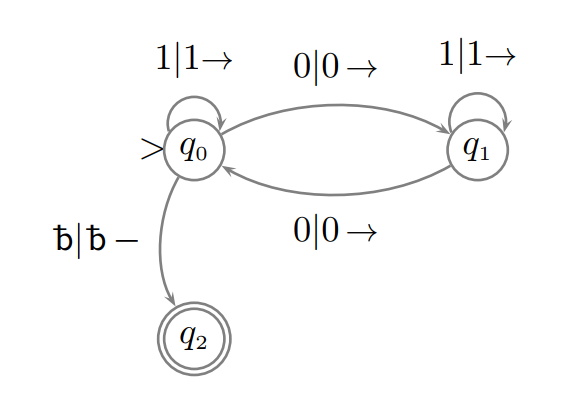

In [ ]:
from IPython.display import Image
Image(filename='files/tm_2.png',width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura. Diagrama de estados de TM que acepta palabras con un número par de ceros</div>
</div>
<br>

A continuación se muestra el esquema de código que representa la máquina de Turing que reconoce palabras que tienen un número par de enteros. Definimos simbolo de cinta, simbolos de entrada, estados y funciones de transición. 

- Las funciones de transición se representan como: 


'q0': {
            '1': ('q0', '1', 'R')
      }
      
      
Que representa $\delta(q_0, 1) = (q_0, 1, ->)$. 

A continuación se muestra el ejemplo implementado. 

In [ ]:
dtm = DTM(
    states={'qA','qB','qC','qD','qE','qF','qG','qH','qI','qJ','qK','qL','qM','qN','qO','qP','qQ','qR','q000',
            'qS','qT','qU','qV','qW','qX','qY','qZ','q0','q1','q2','q3','q4','q5','q6','q7','q8','q9','qto2','qto8','qto9,0',
            'Qa','Qb','Qc','Qd','Qe','Qf','Qg','Qh','Qi','Qj','Qk','Ql','Qm','Qn','Qo','Qp','Qq','Qr',
            'Qs','Qt','Qu','Qv','Qw','Qx','Qy','Qz','Q0','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','q099','q100','q101'},
    input_symbols={'.','-',' '},
    tape_symbols={'.','-',' ','#','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w',
                 'x','y','z','0','1','2','3','4','5','6','7','8','9'}, 
    transitions={
        'q000': {'.': ('qE', '#', 'R'),'-': ('qT', '#', 'R')},
        
        'qE': {' ': ('Qe', '#', 'R'),'.': ('qI', '#', 'R'),'-': ('qA', '#', 'R')},
        'qT': {' ': ('Qt', '#', 'R'),'.': ('qN', '#', 'R'),'-': ('qM', '#', 'R')},
        
        'qI': {' ': ('Qi', '#', 'R'),'.': ('qS', '#', 'R'),'-': ('qU', '#', 'R')},
        'qA': {' ': ('Qa', '#', 'R'),'.': ('qR', '#', 'R'),'-': ('qW', '#', 'R')},
        'qN': {' ': ('Qn', '#', 'R'),'.': ('qD', '#', 'R'),'-': ('qK', '#', 'R')},
        'qM': {' ': ('Qm', '#', 'R'),'.': ('qG', '#', 'R'),'-': ('qO', '#', 'R')},
        
        'qS': {' ': ('Qs', '#', 'R'),'.': ('qH', '#', 'R'),'-': ('qV', '#', 'R')},
        'qU': {' ': ('Qu', '#', 'R'),'.': ('qF', '#', 'R'),'-': ('qto2', '#', 'R')},
        'qR': {' ': ('Qr', '#', 'R'),'.': ('qL', '#', 'R')},
        'qW': {' ': ('Qw', '#', 'R'),'.': ('qP', '#', 'R'),'-': ('qJ', '#', 'R')},
        'qD': {' ': ('Qd', '#', 'R'),'.': ('qB', '#', 'R'),'-': ('qX', '#', 'R')},
        'qK': {' ': ('Qk', '#', 'R'),'.': ('qC', '#', 'R'),'-': ('qY', '#', 'R')},
        'qG': {' ': ('Qg', '#', 'R'),'.': ('qZ', '#', 'R'),'-': ('qQ', '#', 'R')},
        'qO': {' ': ('Qo', '#', 'R'),'.': ('qto8', '#', 'R'),'-': ('qto9,0', '#', 'R')},
        
        'qH': {' ': ('Qh', '#', 'R'),'.': ('q5', '#', 'R'),'-': ('q4', '#', 'R')},
        'qV': {' ': ('Qv', '#', 'R'),'-': ('q3', '#', 'R')},
        'qF': {' ': ('Qf', '#', 'R')},
        'qto2': {'-': ('q2', '#', 'R')},
        'qL': {' ': ('Ql', '#', 'R')},
        'qP': {' ': ('Qp', '#', 'R')},
        'qJ': {' ': ('Qj', '#', 'R'),'-': ('q1', '#', 'R')},
        'qB': {' ': ('Qb', '#', 'R'),'.': ('q6', '#', 'R')},
        'qX': {' ': ('Qx', '#', 'R')},
        'qC': {' ': ('Qc', '#', 'R')},
        'qY': {' ': ('Qy', '#', 'R')},
        'qZ': {' ': ('Qz', '#', 'R'),'.': ('q7', '#', 'R')},
        'qQ': {' ': ('Qq', '#', 'R')},
        'qto8': {'.': ('q8', '#', 'R')},
        'qto9,0': {'.': ('q9', '#', 'R'),'-': ('q0', '#', 'R')},
        
        'q5': {' ': ('Q5', '#', 'R')},
        'q4': {' ': ('Q4', '#', 'R')},
        'q3': {' ': ('Q3', '#', 'R')},
        'q2': {' ': ('Q2', '#', 'R')},
        'q1': {' ': ('Q1', '#', 'R')},
        'q6': {' ': ('Q6', '#', 'R')},
        'q7': {' ': ('Q7', '#', 'R')},
        'q8': {' ': ('Q8', '#', 'R')},
        'q9': {' ': ('Q9', '#', 'R')},
        'q0': {' ': ('Q0', '#', 'R')},
        
        
        'Qe': {
            '#': ('q100', 'e', 'L'),
            ' ': ('Qe', ' ', 'R'),'.': ('Qe', '.', 'R'),'-': ('Qe', '-', 'R'),
            'a': ('Qe', 'a', 'R'),'b': ('Qe', 'b', 'R'),'c': ('Qe', 'c', 'R'),'d': ('Qe', 'd', 'R'),'e': ('Qe', 'e', 'R'),'f': ('Qe', 'f', 'R'),
            'g': ('Qe', 'g', 'R'),'h': ('Qe', 'h', 'R'),'i': ('Qe', 'i', 'R'),'j': ('Qe', 'j', 'R'),'k': ('Qe', 'k', 'R'),'l': ('Qe', 'l', 'R'),
            'm': ('Qe', 'm', 'R'),'n': ('Qe', 'n', 'R'),'o': ('Qe', 'o', 'R'),'p': ('Qe', 'p', 'R'),'q': ('Qe', 'q', 'R'),'r': ('Qe', 'r', 'R'),
            's': ('Qe', 's', 'R'),'t': ('Qe', 't', 'R'),'u': ('Qe', 'u', 'R'),'v': ('Qe', 'v', 'R'),'w': ('Qe', 'w', 'R'),'x': ('Qe', 'x', 'R'),
            'y': ('Qe', 'y', 'R'),'z': ('Qe', 'z', 'R'),'0': ('Qe', '0', 'R'),'1': ('Qe', '1', 'R'),'2': ('Qe', '2', 'R'),'3': ('Qe', '3', 'R'),
            '4': ('Qe', '4', 'R'),'5': ('Qe', '5', 'R'),'6': ('Qe', '6', 'R'),'7': ('Qe', '7', 'R'),'8': ('Qe', '8', 'R'),'9': ('Qe', '9', 'R')
        },
        'Qt': {
            '#': ('q100', 't', 'L'),
            ' ': ('Qt', ' ', 'R'),'.': ('Qt', '.', 'R'),'-': ('Qt', '-', 'R'),
            'a': ('Qt', 'a', 'R'),'b': ('Qt', 'b', 'R'),'c': ('Qt', 'c', 'R'),'d': ('Qt', 'd', 'R'),'e': ('Qt', 'e', 'R'),'f': ('Qt', 'f', 'R'),
            'g': ('Qt', 'g', 'R'),'h': ('Qt', 'h', 'R'),'i': ('Qt', 'i', 'R'),'j': ('Qt', 'j', 'R'),'k': ('Qt', 'k', 'R'),'l': ('Qt', 'l', 'R'),
            'm': ('Qt', 'm', 'R'),'n': ('Qt', 'n', 'R'),'o': ('Qt', 'o', 'R'),'p': ('Qt', 'p', 'R'),'q': ('Qt', 'q', 'R'),'r': ('Qt', 'r', 'R'),
            's': ('Qt', 's', 'R'),'t': ('Qt', 't', 'R'),'u': ('Qt', 'u', 'R'),'v': ('Qt', 'v', 'R'),'w': ('Qt', 'w', 'R'),'x': ('Qt', 'x', 'R'),
            'y': ('Qt', 'y', 'R'),'z': ('Qt', 'z', 'R'),'0': ('Qt', '0', 'R'),'1': ('Qt', '1', 'R'),'2': ('Qt', '2', 'R'),'3': ('Qt', '3', 'R'),
            '4': ('Qt', '4', 'R'),'5': ('Qt', '5', 'R'),'6': ('Qt', '6', 'R'),'7': ('Qt', '7', 'R'),'8': ('Qt', '8', 'R'),'9': ('Qt', '9', 'R')
        },
        'Qi': {
            '#': ('q100', 'i', 'L'),
            ' ': ('Qi', ' ', 'R'),'.': ('Qi', '.', 'R'),'-': ('Qi', '-', 'R'),
            'a': ('Qi', 'a', 'R'),'b': ('Qi', 'b', 'R'),'c': ('Qi', 'c', 'R'),'d': ('Qi', 'd', 'R'),'e': ('Qi', 'e', 'R'),'f': ('Qi', 'f', 'R'),
            'g': ('Qi', 'g', 'R'),'h': ('Qi', 'h', 'R'),'i': ('Qi', 'i', 'R'),'j': ('Qi', 'j', 'R'),'k': ('Qi', 'k', 'R'),'l': ('Qi', 'l', 'R'),
            'm': ('Qi', 'm', 'R'),'n': ('Qi', 'n', 'R'),'o': ('Qi', 'o', 'R'),'p': ('Qi', 'p', 'R'),'q': ('Qi', 'q', 'R'),'r': ('Qi', 'r', 'R'),
            's': ('Qi', 's', 'R'),'t': ('Qi', 't', 'R'),'u': ('Qi', 'u', 'R'),'v': ('Qi', 'v', 'R'),'w': ('Qi', 'w', 'R'),'x': ('Qi', 'x', 'R'),
            'y': ('Qi', 'y', 'R'),'z': ('Qi', 'z', 'R'),'0': ('Qi', '0', 'R'),'1': ('Qi', '1', 'R'),'2': ('Qi', '2', 'R'),'3': ('Qi', '3', 'R'),
            '4': ('Qi', '4', 'R'),'5': ('Qi', '5', 'R'),'6': ('Qi', '6', 'R'),'7': ('Qi', '7', 'R'),'8': ('Qi', '8', 'R'),'9': ('Qi', '9', 'R')
        },
        'Qa': {
            '#': ('q100', 'a', 'L'),
            ' ': ('Qa', ' ', 'R'),'.': ('Qa', '.', 'R'),'-': ('Qa', '-', 'R'),
            'a': ('Qa', 'a', 'R'),'b': ('Qa', 'b', 'R'),'c': ('Qa', 'c', 'R'),'d': ('Qa', 'd', 'R'),'e': ('Qa', 'e', 'R'),'f': ('Qa', 'f', 'R'),
            'g': ('Qa', 'g', 'R'),'h': ('Qa', 'h', 'R'),'i': ('Qa', 'i', 'R'),'j': ('Qa', 'j', 'R'),'k': ('Qa', 'k', 'R'),'l': ('Qa', 'l', 'R'),
            'm': ('Qa', 'm', 'R'),'n': ('Qa', 'n', 'R'),'o': ('Qa', 'o', 'R'),'p': ('Qa', 'p', 'R'),'q': ('Qa', 'q', 'R'),'r': ('Qa', 'r', 'R'),
            's': ('Qa', 's', 'R'),'t': ('Qa', 't', 'R'),'u': ('Qa', 'u', 'R'),'v': ('Qa', 'v', 'R'),'w': ('Qa', 'w', 'R'),'x': ('Qa', 'x', 'R'),
            'y': ('Qa', 'y', 'R'),'z': ('Qa', 'z', 'R'),'0': ('Qa', '0', 'R'),'1': ('Qa', '1', 'R'),'2': ('Qa', '2', 'R'),'3': ('Qa', '3', 'R'),
            '4': ('Qa', '4', 'R'),'5': ('Qa', '5', 'R'),'6': ('Qa', '6', 'R'),'7': ('Qa', '7', 'R'),'8': ('Qa', '8', 'R'),'9': ('Qa', '9', 'R')
        },
        'Qn': {
            '#': ('q100', 'n', 'L'),
            ' ': ('Qn', ' ', 'R'),'.': ('Qn', '.', 'R'),'-': ('Qn', '-', 'R'),
            'a': ('Qn', 'a', 'R'),'b': ('Qn', 'b', 'R'),'c': ('Qn', 'c', 'R'),'d': ('Qn', 'd', 'R'),'e': ('Qn', 'e', 'R'),'f': ('Qn', 'f', 'R'),
            'g': ('Qn', 'g', 'R'),'h': ('Qn', 'h', 'R'),'i': ('Qn', 'i', 'R'),'j': ('Qn', 'j', 'R'),'k': ('Qn', 'k', 'R'),'l': ('Qn', 'l', 'R'),
            'm': ('Qn', 'm', 'R'),'n': ('Qn', 'n', 'R'),'o': ('Qn', 'o', 'R'),'p': ('Qn', 'p', 'R'),'q': ('Qn', 'q', 'R'),'r': ('Qn', 'r', 'R'),
            's': ('Qn', 's', 'R'),'t': ('Qn', 't', 'R'),'u': ('Qn', 'u', 'R'),'v': ('Qn', 'v', 'R'),'w': ('Qn', 'w', 'R'),'x': ('Qn', 'x', 'R'),
            'y': ('Qn', 'y', 'R'),'z': ('Qn', 'z', 'R'),'0': ('Qn', '0', 'R'),'1': ('Qn', '1', 'R'),'2': ('Qn', '2', 'R'),'3': ('Qn', '3', 'R'),
            '4': ('Qn', '4', 'R'),'5': ('Qn', '5', 'R'),'6': ('Qn', '6', 'R'),'7': ('Qn', '7', 'R'),'8': ('Qn', '8', 'R'),'9': ('Qn', '9', 'R')
        },
        'Qm': {
            '#': ('q100', 'm', 'L'),
            ' ': ('Qm', ' ', 'R'),'.': ('Qm', '.', 'R'),'-': ('Qm', '-', 'R'),
            'a': ('Qm', 'a', 'R'),'b': ('Qm', 'b', 'R'),'c': ('Qm', 'c', 'R'),'d': ('Qm', 'd', 'R'),'e': ('Qm', 'e', 'R'),'f': ('Qm', 'f', 'R'),
            'g': ('Qm', 'g', 'R'),'h': ('Qm', 'h', 'R'),'i': ('Qm', 'i', 'R'),'j': ('Qm', 'j', 'R'),'k': ('Qm', 'k', 'R'),'l': ('Qm', 'l', 'R'),
            'm': ('Qm', 'm', 'R'),'n': ('Qm', 'n', 'R'),'o': ('Qm', 'o', 'R'),'p': ('Qm', 'p', 'R'),'q': ('Qm', 'q', 'R'),'r': ('Qm', 'r', 'R'),
            's': ('Qm', 's', 'R'),'t': ('Qm', 't', 'R'),'u': ('Qm', 'u', 'R'),'v': ('Qm', 'v', 'R'),'w': ('Qm', 'w', 'R'),'x': ('Qm', 'x', 'R'),
            'y': ('Qm', 'y', 'R'),'z': ('Qm', 'z', 'R'),'0': ('Qm', '0', 'R'),'1': ('Qm', '1', 'R'),'2': ('Qm', '2', 'R'),'3': ('Qm', '3', 'R'),
            '4': ('Qm', '4', 'R'),'5': ('Qm', '5', 'R'),'6': ('Qm', '6', 'R'),'7': ('Qm', '7', 'R'),'8': ('Qm', '8', 'R'),'9': ('Qm', '9', 'R')
        },
        'Qs': {
            '#': ('q100', 's', 'L'),
            ' ': ('Qs', ' ', 'R'),'.': ('Qs', '.', 'R'),'-': ('Qs', '-', 'R'),
            'a': ('Qs', 'a', 'R'),'b': ('Qs', 'b', 'R'),'c': ('Qs', 'c', 'R'),'d': ('Qs', 'd', 'R'),'e': ('Qs', 'e', 'R'),'f': ('Qs', 'f', 'R'),
            'g': ('Qs', 'g', 'R'),'h': ('Qs', 'h', 'R'),'i': ('Qs', 'i', 'R'),'j': ('Qs', 'j', 'R'),'k': ('Qs', 'k', 'R'),'l': ('Qs', 'l', 'R'),
            'm': ('Qs', 'm', 'R'),'n': ('Qs', 'n', 'R'),'o': ('Qs', 'o', 'R'),'p': ('Qs', 'p', 'R'),'q': ('Qs', 'q', 'R'),'r': ('Qs', 'r', 'R'),
            's': ('Qs', 's', 'R'),'t': ('Qs', 't', 'R'),'u': ('Qs', 'u', 'R'),'v': ('Qs', 'v', 'R'),'w': ('Qs', 'w', 'R'),'x': ('Qs', 'x', 'R'),
            'y': ('Qs', 'y', 'R'),'z': ('Qs', 'z', 'R'),'0': ('Qs', '0', 'R'),'1': ('Qs', '1', 'R'),'2': ('Qs', '2', 'R'),'3': ('Qs', '3', 'R'),
            '4': ('Qs', '4', 'R'),'5': ('Qs', '5', 'R'),'6': ('Qs', '6', 'R'),'7': ('Qs', '7', 'R'),'8': ('Qs', '8', 'R'),'9': ('Qs', '9', 'R')
        },
        'Qu': {
            '#': ('q100', 'u', 'L'),
            ' ': ('Qu', ' ', 'R'),'.': ('Qu', '.', 'R'),'-': ('Qu', '-', 'R'),
            'a': ('Qu', 'a', 'R'),'b': ('Qu', 'b', 'R'),'c': ('Qu', 'c', 'R'),'d': ('Qu', 'd', 'R'),'e': ('Qu', 'e', 'R'),'f': ('Qu', 'f', 'R'),
            'g': ('Qu', 'g', 'R'),'h': ('Qu', 'h', 'R'),'i': ('Qu', 'i', 'R'),'j': ('Qu', 'j', 'R'),'k': ('Qu', 'k', 'R'),'l': ('Qu', 'l', 'R'),
            'm': ('Qu', 'm', 'R'),'n': ('Qu', 'n', 'R'),'o': ('Qu', 'o', 'R'),'p': ('Qu', 'p', 'R'),'q': ('Qu', 'q', 'R'),'r': ('Qu', 'r', 'R'),
            's': ('Qu', 's', 'R'),'t': ('Qu', 't', 'R'),'u': ('Qu', 'u', 'R'),'v': ('Qu', 'v', 'R'),'w': ('Qu', 'w', 'R'),'x': ('Qu', 'x', 'R'),
            'y': ('Qu', 'y', 'R'),'z': ('Qu', 'z', 'R'),'0': ('Qu', '0', 'R'),'1': ('Qu', '1', 'R'),'2': ('Qu', '2', 'R'),'3': ('Qu', '3', 'R'),
            '4': ('Qu', '4', 'R'),'5': ('Qu', '5', 'R'),'6': ('Qu', '6', 'R'),'7': ('Qu', '7', 'R'),'8': ('Qu', '8', 'R'),'9': ('Qu', '9', 'R')
        },
        'Qr': {
            '#': ('q100', 'r', 'L'),
            ' ': ('Qr', ' ', 'R'),'.': ('Qr', '.', 'R'),'-': ('Qr', '-', 'R'),
            'a': ('Qr', 'a', 'R'),'b': ('Qr', 'b', 'R'),'c': ('Qr', 'c', 'R'),'d': ('Qr', 'd', 'R'),'e': ('Qr', 'e', 'R'),'f': ('Qr', 'f', 'R'),
            'g': ('Qr', 'g', 'R'),'h': ('Qr', 'h', 'R'),'i': ('Qr', 'i', 'R'),'j': ('Qr', 'j', 'R'),'k': ('Qr', 'k', 'R'),'l': ('Qr', 'l', 'R'),
            'm': ('Qr', 'm', 'R'),'n': ('Qr', 'n', 'R'),'o': ('Qr', 'o', 'R'),'p': ('Qr', 'p', 'R'),'q': ('Qr', 'q', 'R'),'r': ('Qr', 'r', 'R'),
            's': ('Qr', 's', 'R'),'t': ('Qr', 't', 'R'),'u': ('Qr', 'u', 'R'),'v': ('Qr', 'v', 'R'),'w': ('Qr', 'w', 'R'),'x': ('Qr', 'x', 'R'),
            'y': ('Qr', 'y', 'R'),'z': ('Qr', 'z', 'R'),'0': ('Qr', '0', 'R'),'1': ('Qr', '1', 'R'),'2': ('Qr', '2', 'R'),'3': ('Qr', '3', 'R'),
            '4': ('Qr', '4', 'R'),'5': ('Qr', '5', 'R'),'6': ('Qr', '6', 'R'),'7': ('Qr', '7', 'R'),'8': ('Qr', '8', 'R'),'9': ('Qr', '9', 'R')
        },
        'Qw': {
            '#': ('q100', 'w', 'L'),
            ' ': ('Qw', ' ', 'R'),'.': ('Qw', '.', 'R'),'-': ('Qw', '-', 'R'),
            'a': ('Qw', 'a', 'R'),'b': ('Qw', 'b', 'R'),'c': ('Qw', 'c', 'R'),'d': ('Qw', 'd', 'R'),'e': ('Qw', 'e', 'R'),'f': ('Qw', 'f', 'R'),
            'g': ('Qw', 'g', 'R'),'h': ('Qw', 'h', 'R'),'i': ('Qw', 'i', 'R'),'j': ('Qw', 'j', 'R'),'k': ('Qw', 'k', 'R'),'l': ('Qw', 'l', 'R'),
            'm': ('Qw', 'm', 'R'),'n': ('Qw', 'n', 'R'),'o': ('Qw', 'o', 'R'),'p': ('Qw', 'p', 'R'),'q': ('Qw', 'q', 'R'),'r': ('Qw', 'r', 'R'),
            's': ('Qw', 's', 'R'),'t': ('Qw', 't', 'R'),'u': ('Qw', 'u', 'R'),'v': ('Qw', 'v', 'R'),'w': ('Qw', 'w', 'R'),'x': ('Qw', 'x', 'R'),
            'y': ('Qw', 'y', 'R'),'z': ('Qw', 'z', 'R'),'0': ('Qw', '0', 'R'),'1': ('Qw', '1', 'R'),'2': ('Qw', '2', 'R'),'3': ('Qw', '3', 'R'),
            '4': ('Qw', '4', 'R'),'5': ('Qw', '5', 'R'),'6': ('Qw', '6', 'R'),'7': ('Qw', '7', 'R'),'8': ('Qw', '8', 'R'),'9': ('Qw', '9', 'R')
        },
        'Qd': {
            '#': ('q100', 'd', 'L'),
            ' ': ('Qd', ' ', 'R'),'.': ('Qd', '.', 'R'),'-': ('Qd', '-', 'R'),
            'a': ('Qd', 'a', 'R'),'b': ('Qd', 'b', 'R'),'c': ('Qd', 'c', 'R'),'d': ('Qd', 'd', 'R'),'e': ('Qd', 'e', 'R'),'f': ('Qd', 'f', 'R'),
            'g': ('Qd', 'g', 'R'),'h': ('Qd', 'h', 'R'),'i': ('Qd', 'i', 'R'),'j': ('Qd', 'j', 'R'),'k': ('Qd', 'k', 'R'),'l': ('Qd', 'l', 'R'),
            'm': ('Qd', 'm', 'R'),'n': ('Qd', 'n', 'R'),'o': ('Qd', 'o', 'R'),'p': ('Qd', 'p', 'R'),'q': ('Qd', 'q', 'R'),'r': ('Qd', 'r', 'R'),
            's': ('Qd', 's', 'R'),'t': ('Qd', 't', 'R'),'u': ('Qd', 'u', 'R'),'v': ('Qd', 'v', 'R'),'w': ('Qd', 'w', 'R'),'x': ('Qd', 'x', 'R'),
            'y': ('Qd', 'y', 'R'),'z': ('Qd', 'z', 'R'),'0': ('Qd', '0', 'R'),'1': ('Qd', '1', 'R'),'2': ('Qd', '2', 'R'),'3': ('Qd', '3', 'R'),
            '4': ('Qd', '4', 'R'),'5': ('Qd', '5', 'R'),'6': ('Qd', '6', 'R'),'7': ('Qd', '7', 'R'),'8': ('Qd', '8', 'R'),'9': ('Qd', '9', 'R')
        },
        'Qk': {
            '#': ('q100', 'k', 'L'),
            ' ': ('Qk', ' ', 'R'),'.': ('Qk', '.', 'R'),'-': ('Qk', '-', 'R'),
            'a': ('Qk', 'a', 'R'),'b': ('Qk', 'b', 'R'),'c': ('Qk', 'c', 'R'),'d': ('Qk', 'd', 'R'),'e': ('Qk', 'e', 'R'),'f': ('Qk', 'f', 'R'),
            'g': ('Qk', 'g', 'R'),'h': ('Qk', 'h', 'R'),'i': ('Qk', 'i', 'R'),'j': ('Qk', 'j', 'R'),'k': ('Qk', 'k', 'R'),'l': ('Qk', 'l', 'R'),
            'm': ('Qk', 'm', 'R'),'n': ('Qk', 'n', 'R'),'o': ('Qk', 'o', 'R'),'p': ('Qk', 'p', 'R'),'q': ('Qk', 'q', 'R'),'r': ('Qk', 'r', 'R'),
            's': ('Qk', 's', 'R'),'t': ('Qk', 't', 'R'),'u': ('Qk', 'u', 'R'),'v': ('Qk', 'v', 'R'),'w': ('Qk', 'w', 'R'),'x': ('Qk', 'x', 'R'),
            'y': ('Qk', 'y', 'R'),'z': ('Qk', 'z', 'R'),'0': ('Qk', '0', 'R'),'1': ('Qk', '1', 'R'),'2': ('Qk', '2', 'R'),'3': ('Qk', '3', 'R'),
            '4': ('Qk', '4', 'R'),'5': ('Qk', '5', 'R'),'6': ('Qk', '6', 'R'),'7': ('Qk', '7', 'R'),'8': ('Qk', '8', 'R'),'9': ('Qk', '9', 'R')
        },
        'Qg': {
            '#': ('q100', 'g', 'L'),
            ' ': ('Qg', ' ', 'R'),'.': ('Qg', '.', 'R'),'-': ('Qg', '-', 'R'),
            'a': ('Qg', 'a', 'R'),'b': ('Qg', 'b', 'R'),'c': ('Qg', 'c', 'R'),'d': ('Qg', 'd', 'R'),'e': ('Qg', 'e', 'R'),'f': ('Qg', 'f', 'R'),
            'g': ('Qg', 'g', 'R'),'h': ('Qg', 'h', 'R'),'i': ('Qg', 'i', 'R'),'j': ('Qg', 'j', 'R'),'k': ('Qg', 'k', 'R'),'l': ('Qg', 'l', 'R'),
            'm': ('Qg', 'm', 'R'),'n': ('Qg', 'n', 'R'),'o': ('Qg', 'o', 'R'),'p': ('Qg', 'p', 'R'),'q': ('Qg', 'q', 'R'),'r': ('Qg', 'r', 'R'),
            's': ('Qg', 's', 'R'),'t': ('Qg', 't', 'R'),'u': ('Qg', 'u', 'R'),'v': ('Qg', 'v', 'R'),'w': ('Qg', 'w', 'R'),'x': ('Qg', 'x', 'R'),
            'y': ('Qg', 'y', 'R'),'z': ('Qg', 'z', 'R'),'0': ('Qg', '0', 'R'),'1': ('Qg', '1', 'R'),'2': ('Qg', '2', 'R'),'3': ('Qg', '3', 'R'),
            '4': ('Qg', '4', 'R'),'5': ('Qg', '5', 'R'),'6': ('Qg', '6', 'R'),'7': ('Qg', '7', 'R'),'8': ('Qg', '8', 'R'),'9': ('Qg', '9', 'R')
        },
        'Qo': {
            '#': ('q100', 'o', 'L'),
            ' ': ('Qo', ' ', 'R'),'.': ('Qo', '.', 'R'),'-': ('Qo', '-', 'R'),
            'a': ('Qo', 'a', 'R'),'b': ('Qo', 'b', 'R'),'c': ('Qo', 'c', 'R'),'d': ('Qo', 'd', 'R'),'e': ('Qo', 'e', 'R'),'f': ('Qo', 'f', 'R'),
            'g': ('Qo', 'g', 'R'),'h': ('Qo', 'h', 'R'),'i': ('Qo', 'i', 'R'),'j': ('Qo', 'j', 'R'),'k': ('Qo', 'k', 'R'),'l': ('Qo', 'l', 'R'),
            'm': ('Qo', 'm', 'R'),'n': ('Qo', 'n', 'R'),'o': ('Qo', 'o', 'R'),'p': ('Qo', 'p', 'R'),'q': ('Qo', 'q', 'R'),'r': ('Qo', 'r', 'R'),
            's': ('Qo', 's', 'R'),'t': ('Qo', 't', 'R'),'u': ('Qo', 'u', 'R'),'v': ('Qo', 'v', 'R'),'w': ('Qo', 'w', 'R'),'x': ('Qo', 'x', 'R'),
            'y': ('Qo', 'y', 'R'),'z': ('Qo', 'z', 'R'),'0': ('Qo', '0', 'R'),'1': ('Qo', '1', 'R'),'2': ('Qo', '2', 'R'),'3': ('Qo', '3', 'R'),
            '4': ('Qo', '4', 'R'),'5': ('Qo', '5', 'R'),'6': ('Qo', '6', 'R'),'7': ('Qo', '7', 'R'),'8': ('Qo', '8', 'R'),'9': ('Qo', '9', 'R')
        },
        'Qh': {
            '#': ('q100', 'h', 'L'),
            ' ': ('Qh', ' ', 'R'),'.': ('Qh', '.', 'R'),'-': ('Qh', '-', 'R'),
            'a': ('Qh', 'a', 'R'),'b': ('Qh', 'b', 'R'),'c': ('Qh', 'c', 'R'),'d': ('Qh', 'd', 'R'),'e': ('Qh', 'e', 'R'),'f': ('Qh', 'f', 'R'),
            'g': ('Qh', 'g', 'R'),'h': ('Qh', 'h', 'R'),'i': ('Qh', 'i', 'R'),'j': ('Qh', 'j', 'R'),'k': ('Qh', 'k', 'R'),'l': ('Qh', 'l', 'R'),
            'm': ('Qh', 'm', 'R'),'n': ('Qh', 'n', 'R'),'o': ('Qh', 'o', 'R'),'p': ('Qh', 'p', 'R'),'q': ('Qh', 'q', 'R'),'r': ('Qh', 'r', 'R'),
            's': ('Qh', 's', 'R'),'t': ('Qh', 't', 'R'),'u': ('Qh', 'u', 'R'),'v': ('Qh', 'v', 'R'),'w': ('Qh', 'w', 'R'),'x': ('Qh', 'x', 'R'),
            'y': ('Qh', 'y', 'R'),'z': ('Qh', 'z', 'R'),'0': ('Qh', '0', 'R'),'1': ('Qh', '1', 'R'),'2': ('Qh', '2', 'R'),'3': ('Qh', '3', 'R'),
            '4': ('Qh', '4', 'R'),'5': ('Qh', '5', 'R'),'6': ('Qh', '6', 'R'),'7': ('Qh', '7', 'R'),'8': ('Qh', '8', 'R'),'9': ('Qh', '9', 'R')
        },
        'Qv': {
            '#': ('q100', 'v', 'L'),
            ' ': ('Qv', ' ', 'R'),'.': ('Qv', '.', 'R'),'-': ('Qv', '-', 'R'),
            'a': ('Qv', 'a', 'R'),'b': ('Qv', 'b', 'R'),'c': ('Qv', 'c', 'R'),'d': ('Qv', 'd', 'R'),'e': ('Qv', 'e', 'R'),'f': ('Qv', 'f', 'R'),
            'g': ('Qv', 'g', 'R'),'h': ('Qv', 'h', 'R'),'i': ('Qv', 'i', 'R'),'j': ('Qv', 'j', 'R'),'k': ('Qv', 'k', 'R'),'l': ('Qv', 'l', 'R'),
            'm': ('Qv', 'm', 'R'),'n': ('Qv', 'n', 'R'),'o': ('Qv', 'o', 'R'),'p': ('Qv', 'p', 'R'),'q': ('Qv', 'q', 'R'),'r': ('Qv', 'r', 'R'),
            's': ('Qv', 's', 'R'),'t': ('Qv', 't', 'R'),'u': ('Qv', 'u', 'R'),'v': ('Qv', 'v', 'R'),'w': ('Qv', 'w', 'R'),'x': ('Qv', 'x', 'R'),
            'y': ('Qv', 'y', 'R'),'z': ('Qv', 'z', 'R'),'0': ('Qv', '0', 'R'),'1': ('Qv', '1', 'R'),'2': ('Qv', '2', 'R'),'3': ('Qv', '3', 'R'),
            '4': ('Qv', '4', 'R'),'5': ('Qv', '5', 'R'),'6': ('Qv', '6', 'R'),'7': ('Qv', '7', 'R'),'8': ('Qv', '8', 'R'),'9': ('Qv', '9', 'R')
        },
        'Qf': {
            '#': ('q100', 'f', 'L'),
            ' ': ('Qf', ' ', 'R'),'.': ('Qf', '.', 'R'),'-': ('Qf', '-', 'R'),
            'a': ('Qf', 'a', 'R'),'b': ('Qf', 'b', 'R'),'c': ('Qf', 'c', 'R'),'d': ('Qf', 'd', 'R'),'e': ('Qf', 'e', 'R'),'f': ('Qf', 'f', 'R'),
            'g': ('Qf', 'g', 'R'),'h': ('Qf', 'h', 'R'),'i': ('Qf', 'i', 'R'),'j': ('Qf', 'j', 'R'),'k': ('Qf', 'k', 'R'),'l': ('Qf', 'l', 'R'),
            'm': ('Qf', 'm', 'R'),'n': ('Qf', 'n', 'R'),'o': ('Qf', 'o', 'R'),'p': ('Qf', 'p', 'R'),'q': ('Qf', 'q', 'R'),'r': ('Qf', 'r', 'R'),
            's': ('Qf', 's', 'R'),'t': ('Qf', 't', 'R'),'u': ('Qf', 'u', 'R'),'v': ('Qf', 'v', 'R'),'w': ('Qf', 'w', 'R'),'x': ('Qf', 'x', 'R'),
            'y': ('Qf', 'y', 'R'),'z': ('Qf', 'z', 'R'),'0': ('Qf', '0', 'R'),'1': ('Qf', '1', 'R'),'2': ('Qf', '2', 'R'),'3': ('Qf', '3', 'R'),
            '4': ('Qf', '4', 'R'),'5': ('Qf', '5', 'R'),'6': ('Qf', '6', 'R'),'7': ('Qf', '7', 'R'),'8': ('Qf', '8', 'R'),'9': ('Qf', '9', 'R')
        },
        'Ql': {
            '#': ('q100', 'l', 'L'),
            ' ': ('Ql', ' ', 'R'),'.': ('Ql', '.', 'R'),'-': ('Ql', '-', 'R'),
            'a': ('Ql', 'a', 'R'),'b': ('Ql', 'b', 'R'),'c': ('Ql', 'c', 'R'),'d': ('Ql', 'd', 'R'),'e': ('Ql', 'e', 'R'),'f': ('Ql', 'f', 'R'),
            'g': ('Ql', 'g', 'R'),'h': ('Ql', 'h', 'R'),'i': ('Ql', 'i', 'R'),'j': ('Ql', 'j', 'R'),'k': ('Ql', 'k', 'R'),'l': ('Ql', 'l', 'R'),
            'm': ('Ql', 'm', 'R'),'n': ('Ql', 'n', 'R'),'o': ('Ql', 'o', 'R'),'p': ('Ql', 'p', 'R'),'q': ('Ql', 'q', 'R'),'r': ('Ql', 'r', 'R'),
            's': ('Ql', 's', 'R'),'t': ('Ql', 't', 'R'),'u': ('Ql', 'u', 'R'),'v': ('Ql', 'v', 'R'),'w': ('Ql', 'w', 'R'),'x': ('Ql', 'x', 'R'),
            'y': ('Ql', 'y', 'R'),'z': ('Ql', 'z', 'R'),'0': ('Ql', '0', 'R'),'1': ('Ql', '1', 'R'),'2': ('Ql', '2', 'R'),'3': ('Ql', '3', 'R'),
            '4': ('Ql', '4', 'R'),'5': ('Ql', '5', 'R'),'6': ('Ql', '6', 'R'),'7': ('Ql', '7', 'R'),'8': ('Ql', '8', 'R'),'9': ('Ql', '9', 'R')
        },
        'Qp': {
            '#': ('q100', 'p', 'L'),
            ' ': ('Qp', ' ', 'R'),'.': ('Qp', '.', 'R'),'-': ('Qp', '-', 'R'),
            'a': ('Qp', 'a', 'R'),'b': ('Qp', 'b', 'R'),'c': ('Qp', 'c', 'R'),'d': ('Qp', 'd', 'R'),'e': ('Qp', 'e', 'R'),'f': ('Qp', 'f', 'R'),
            'g': ('Qp', 'g', 'R'),'h': ('Qp', 'h', 'R'),'i': ('Qp', 'i', 'R'),'j': ('Qp', 'j', 'R'),'k': ('Qp', 'k', 'R'),'l': ('Qp', 'l', 'R'),
            'm': ('Qp', 'm', 'R'),'n': ('Qp', 'n', 'R'),'o': ('Qp', 'o', 'R'),'p': ('Qp', 'p', 'R'),'q': ('Qp', 'q', 'R'),'r': ('Qp', 'r', 'R'),
            's': ('Qp', 's', 'R'),'t': ('Qp', 't', 'R'),'u': ('Qp', 'u', 'R'),'v': ('Qp', 'v', 'R'),'w': ('Qp', 'w', 'R'),'x': ('Qp', 'x', 'R'),
            'y': ('Qp', 'y', 'R'),'z': ('Qp', 'z', 'R'),'0': ('Qp', '0', 'R'),'1': ('Qp', '1', 'R'),'2': ('Qp', '2', 'R'),'3': ('Qp', '3', 'R'),
            '4': ('Qp', '4', 'R'),'5': ('Qp', '5', 'R'),'6': ('Qp', '6', 'R'),'7': ('Qp', '7', 'R'),'8': ('Qp', '8', 'R'),'9': ('Qp', '9', 'R')
        },
        'Qj': {
            '#': ('q100', 'j', 'L'),
            ' ': ('Qj', ' ', 'R'),'.': ('Qj', '.', 'R'),'-': ('Qj', '-', 'R'),
            'a': ('Qj', 'a', 'R'),'b': ('Qj', 'b', 'R'),'c': ('Qj', 'c', 'R'),'d': ('Qj', 'd', 'R'),'e': ('Qj', 'e', 'R'),'f': ('Qj', 'f', 'R'),
            'g': ('Qj', 'g', 'R'),'h': ('Qj', 'h', 'R'),'i': ('Qj', 'i', 'R'),'j': ('Qj', 'j', 'R'),'k': ('Qj', 'k', 'R'),'l': ('Qj', 'l', 'R'),
            'm': ('Qj', 'm', 'R'),'n': ('Qj', 'n', 'R'),'o': ('Qj', 'o', 'R'),'p': ('Qj', 'p', 'R'),'q': ('Qj', 'q', 'R'),'r': ('Qj', 'r', 'R'),
            's': ('Qj', 's', 'R'),'t': ('Qj', 't', 'R'),'u': ('Qj', 'u', 'R'),'v': ('Qj', 'v', 'R'),'w': ('Qj', 'w', 'R'),'x': ('Qj', 'x', 'R'),
            'y': ('Qj', 'y', 'R'),'z': ('Qj', 'z', 'R'),'0': ('Qj', '0', 'R'),'1': ('Qj', '1', 'R'),'2': ('Qj', '2', 'R'),'3': ('Qj', '3', 'R'),
            '4': ('Qj', '4', 'R'),'5': ('Qj', '5', 'R'),'6': ('Qj', '6', 'R'),'7': ('Qj', '7', 'R'),'8': ('Qj', '8', 'R'),'9': ('Qj', '9', 'R')
        },
        'Qb': {
            '#': ('q100', 'b', 'L'),
            ' ': ('Qb', ' ', 'R'),'.': ('Qb', '.', 'R'),'-': ('Qb', '-', 'R'),
            'a': ('Qb', 'a', 'R'),'b': ('Qb', 'b', 'R'),'c': ('Qb', 'c', 'R'),'d': ('Qb', 'd', 'R'),'e': ('Qb', 'e', 'R'),'f': ('Qb', 'f', 'R'),
            'g': ('Qb', 'g', 'R'),'h': ('Qb', 'h', 'R'),'i': ('Qb', 'i', 'R'),'j': ('Qb', 'j', 'R'),'k': ('Qb', 'k', 'R'),'l': ('Qb', 'l', 'R'),
            'm': ('Qb', 'm', 'R'),'n': ('Qb', 'n', 'R'),'o': ('Qb', 'o', 'R'),'p': ('Qb', 'p', 'R'),'q': ('Qb', 'q', 'R'),'r': ('Qb', 'r', 'R'),
            's': ('Qb', 's', 'R'),'t': ('Qb', 't', 'R'),'u': ('Qb', 'u', 'R'),'v': ('Qb', 'v', 'R'),'w': ('Qb', 'w', 'R'),'x': ('Qb', 'x', 'R'),
            'y': ('Qb', 'y', 'R'),'z': ('Qb', 'z', 'R'),'0': ('Qb', '0', 'R'),'1': ('Qb', '1', 'R'),'2': ('Qb', '2', 'R'),'3': ('Qb', '3', 'R'),
            '4': ('Qb', '4', 'R'),'5': ('Qb', '5', 'R'),'6': ('Qb', '6', 'R'),'7': ('Qb', '7', 'R'),'8': ('Qb', '8', 'R'),'9': ('Qb', '9', 'R')
        },
        'Qx': {
            '#': ('q100', 'x', 'L'),
            ' ': ('Qx', ' ', 'R'),'.': ('Qx', '.', 'R'),'-': ('Qx', '-', 'R'),
            'a': ('Qx', 'a', 'R'),'b': ('Qx', 'b', 'R'),'c': ('Qx', 'c', 'R'),'d': ('Qx', 'd', 'R'),'e': ('Qx', 'e', 'R'),'f': ('Qx', 'f', 'R'),
            'g': ('Qx', 'g', 'R'),'h': ('Qx', 'h', 'R'),'i': ('Qx', 'i', 'R'),'j': ('Qx', 'j', 'R'),'k': ('Qx', 'k', 'R'),'l': ('Qx', 'l', 'R'),
            'm': ('Qx', 'm', 'R'),'n': ('Qx', 'n', 'R'),'o': ('Qx', 'o', 'R'),'p': ('Qx', 'p', 'R'),'q': ('Qx', 'q', 'R'),'r': ('Qx', 'r', 'R'),
            's': ('Qx', 's', 'R'),'t': ('Qx', 't', 'R'),'u': ('Qx', 'u', 'R'),'v': ('Qx', 'v', 'R'),'w': ('Qx', 'w', 'R'),'x': ('Qx', 'x', 'R'),
            'y': ('Qx', 'y', 'R'),'z': ('Qx', 'z', 'R'),'0': ('Qx', '0', 'R'),'1': ('Qx', '1', 'R'),'2': ('Qx', '2', 'R'),'3': ('Qx', '3', 'R'),
            '4': ('Qx', '4', 'R'),'5': ('Qx', '5', 'R'),'6': ('Qx', '6', 'R'),'7': ('Qx', '7', 'R'),'8': ('Qx', '8', 'R'),'9': ('Qx', '9', 'R')
        },
        'Qc': {
            '#': ('q100', 'c', 'L'),
            ' ': ('Qc', ' ', 'R'),'.': ('Qc', '.', 'R'),'-': ('Qc', '-', 'R'),
            'a': ('Qc', 'a', 'R'),'b': ('Qc', 'b', 'R'),'c': ('Qc', 'c', 'R'),'d': ('Qc', 'd', 'R'),'e': ('Qc', 'e', 'R'),'f': ('Qc', 'f', 'R'),
            'g': ('Qc', 'g', 'R'),'h': ('Qc', 'h', 'R'),'i': ('Qc', 'i', 'R'),'j': ('Qc', 'j', 'R'),'k': ('Qc', 'k', 'R'),'l': ('Qc', 'l', 'R'),
            'm': ('Qc', 'm', 'R'),'n': ('Qc', 'n', 'R'),'o': ('Qc', 'o', 'R'),'p': ('Qc', 'p', 'R'),'q': ('Qc', 'q', 'R'),'r': ('Qc', 'r', 'R'),
            's': ('Qc', 's', 'R'),'t': ('Qc', 't', 'R'),'u': ('Qc', 'u', 'R'),'v': ('Qc', 'v', 'R'),'w': ('Qc', 'w', 'R'),'x': ('Qc', 'x', 'R'),
            'y': ('Qc', 'y', 'R'),'z': ('Qc', 'z', 'R'),'0': ('Qc', '0', 'R'),'1': ('Qc', '1', 'R'),'2': ('Qc', '2', 'R'),'3': ('Qc', '3', 'R'),
            '4': ('Qc', '4', 'R'),'5': ('Qc', '5', 'R'),'6': ('Qc', '6', 'R'),'7': ('Qc', '7', 'R'),'8': ('Qc', '8', 'R'),'9': ('Qc', '9', 'R')
        },
        'Qy': {
            '#': ('q100', 'y', 'L'),
            ' ': ('Qy', ' ', 'R'),'.': ('Qy', '.', 'R'),'-': ('Qy', '-', 'R'),
            'a': ('Qy', 'a', 'R'),'b': ('Qy', 'b', 'R'),'c': ('Qy', 'c', 'R'),'d': ('Qy', 'd', 'R'),'e': ('Qy', 'e', 'R'),'f': ('Qy', 'f', 'R'),
            'g': ('Qy', 'g', 'R'),'h': ('Qy', 'h', 'R'),'i': ('Qy', 'i', 'R'),'j': ('Qy', 'j', 'R'),'k': ('Qy', 'k', 'R'),'l': ('Qy', 'l', 'R'),
            'm': ('Qy', 'm', 'R'),'n': ('Qy', 'n', 'R'),'o': ('Qy', 'o', 'R'),'p': ('Qy', 'p', 'R'),'q': ('Qy', 'q', 'R'),'r': ('Qy', 'r', 'R'),
            's': ('Qy', 's', 'R'),'t': ('Qy', 't', 'R'),'u': ('Qy', 'u', 'R'),'v': ('Qy', 'v', 'R'),'w': ('Qy', 'w', 'R'),'x': ('Qy', 'x', 'R'),
            'y': ('Qy', 'y', 'R'),'z': ('Qy', 'z', 'R'),'0': ('Qy', '0', 'R'),'1': ('Qy', '1', 'R'),'2': ('Qy', '2', 'R'),'3': ('Qy', '3', 'R'),
            '4': ('Qy', '4', 'R'),'5': ('Qy', '5', 'R'),'6': ('Qy', '6', 'R'),'7': ('Qy', '7', 'R'),'8': ('Qy', '8', 'R'),'9': ('Qy', '9', 'R')
        },
        'Qz': {
            '#': ('q100', 'z', 'L'),
            ' ': ('Qz', ' ', 'R'),'.': ('Qz', '.', 'R'),'-': ('Qz', '-', 'R'),
            'a': ('Qz', 'a', 'R'),'b': ('Qz', 'b', 'R'),'c': ('Qz', 'c', 'R'),'d': ('Qz', 'd', 'R'),'e': ('Qz', 'e', 'R'),'f': ('Qz', 'f', 'R'),
            'g': ('Qz', 'g', 'R'),'h': ('Qz', 'h', 'R'),'i': ('Qz', 'i', 'R'),'j': ('Qz', 'j', 'R'),'k': ('Qz', 'k', 'R'),'l': ('Qz', 'l', 'R'),
            'm': ('Qz', 'm', 'R'),'n': ('Qz', 'n', 'R'),'o': ('Qz', 'o', 'R'),'p': ('Qz', 'p', 'R'),'q': ('Qz', 'q', 'R'),'r': ('Qz', 'r', 'R'),
            's': ('Qz', 's', 'R'),'t': ('Qz', 't', 'R'),'u': ('Qz', 'u', 'R'),'v': ('Qz', 'v', 'R'),'w': ('Qz', 'w', 'R'),'x': ('Qz', 'x', 'R'),
            'y': ('Qz', 'y', 'R'),'z': ('Qz', 'z', 'R'),'0': ('Qz', '0', 'R'),'1': ('Qz', '1', 'R'),'2': ('Qz', '2', 'R'),'3': ('Qz', '3', 'R'),
            '4': ('Qz', '4', 'R'),'5': ('Qz', '5', 'R'),'6': ('Qz', '6', 'R'),'7': ('Qz', '7', 'R'),'8': ('Qz', '8', 'R'),'9': ('Qz', '9', 'R')
        },
        'Qq': {
            '#': ('q100', 'q', 'L'),
            ' ': ('Qq', ' ', 'R'),'.': ('Qq', '.', 'R'),'-': ('Qq', '-', 'R'),
            'a': ('Qq', 'a', 'R'),'b': ('Qq', 'b', 'R'),'c': ('Qq', 'c', 'R'),'d': ('Qq', 'd', 'R'),'e': ('Qq', 'e', 'R'),'f': ('Qq', 'f', 'R'),
            'g': ('Qq', 'g', 'R'),'h': ('Qq', 'h', 'R'),'i': ('Qq', 'i', 'R'),'j': ('Qq', 'j', 'R'),'k': ('Qq', 'k', 'R'),'l': ('Qq', 'l', 'R'),
            'm': ('Qq', 'm', 'R'),'n': ('Qq', 'n', 'R'),'o': ('Qq', 'o', 'R'),'p': ('Qq', 'p', 'R'),'q': ('Qq', 'q', 'R'),'r': ('Qq', 'r', 'R'),
            's': ('Qq', 's', 'R'),'t': ('Qq', 't', 'R'),'u': ('Qq', 'u', 'R'),'v': ('Qq', 'v', 'R'),'w': ('Qq', 'w', 'R'),'x': ('Qq', 'x', 'R'),
            'y': ('Qq', 'y', 'R'),'z': ('Qq', 'z', 'R'),'0': ('Qq', '0', 'R'),'1': ('Qq', '1', 'R'),'2': ('Qq', '2', 'R'),'3': ('Qq', '3', 'R'),
            '4': ('Qq', '4', 'R'),'5': ('Qq', '5', 'R'),'6': ('Qq', '6', 'R'),'7': ('Qq', '7', 'R'),'8': ('Qq', '8', 'R'),'9': ('Qq', '9', 'R')
        },
        'Q5': {
            '#': ('q100', '5', 'L'),
            ' ': ('Q5', ' ', 'R'),'.': ('Q5', '.', 'R'),'-': ('Q5', '-', 'R'),
            'a': ('Q5', 'a', 'R'),'b': ('Q5', 'b', 'R'),'c': ('Q5', 'c', 'R'),'d': ('Q5', 'd', 'R'),'e': ('Q5', 'e', 'R'),'f': ('Q5', 'f', 'R'),
            'g': ('Q5', 'g', 'R'),'h': ('Q5', 'h', 'R'),'i': ('Q5', 'i', 'R'),'j': ('Q5', 'j', 'R'),'k': ('Q5', 'k', 'R'),'l': ('Q5', 'l', 'R'),
            'm': ('Q5', 'm', 'R'),'n': ('Q5', 'n', 'R'),'o': ('Q5', 'o', 'R'),'p': ('Q5', 'p', 'R'),'q': ('Q5', 'q', 'R'),'r': ('Q5', 'r', 'R'),
            's': ('Q5', 's', 'R'),'t': ('Q5', 't', 'R'),'u': ('Q5', 'u', 'R'),'v': ('Q5', 'v', 'R'),'w': ('Q5', 'w', 'R'),'x': ('Q5', 'x', 'R'),
            'y': ('Q5', 'y', 'R'),'z': ('Q5', 'z', 'R'),'0': ('Q5', '0', 'R'),'1': ('Q5', '1', 'R'),'2': ('Q5', '2', 'R'),'3': ('Q5', '3', 'R'),
            '4': ('Q5', '4', 'R'),'5': ('Q5', '5', 'R'),'6': ('Q5', '6', 'R'),'7': ('Q5', '7', 'R'),'8': ('Q5', '8', 'R'),'9': ('Q5', '9', 'R')
        },
        'Q4': {
            '#': ('q100', '4', 'L'),
            ' ': ('Q4', ' ', 'R'),'.': ('Q4', '.', 'R'),'-': ('Q4', '-', 'R'),
            'a': ('Q4', 'a', 'R'),'b': ('Q4', 'b', 'R'),'c': ('Q4', 'c', 'R'),'d': ('Q4', 'd', 'R'),'e': ('Q4', 'e', 'R'),'f': ('Q4', 'f', 'R'),
            'g': ('Q4', 'g', 'R'),'h': ('Q4', 'h', 'R'),'i': ('Q4', 'i', 'R'),'j': ('Q4', 'j', 'R'),'k': ('Q4', 'k', 'R'),'l': ('Q4', 'l', 'R'),
            'm': ('Q4', 'm', 'R'),'n': ('Q4', 'n', 'R'),'o': ('Q4', 'o', 'R'),'p': ('Q4', 'p', 'R'),'q': ('Q4', 'q', 'R'),'r': ('Q4', 'r', 'R'),
            's': ('Q4', 's', 'R'),'t': ('Q4', 't', 'R'),'u': ('Q4', 'u', 'R'),'v': ('Q4', 'v', 'R'),'w': ('Q4', 'w', 'R'),'x': ('Q4', 'x', 'R'),
            'y': ('Q4', 'y', 'R'),'z': ('Q4', 'z', 'R'),'0': ('Q4', '0', 'R'),'1': ('Q4', '1', 'R'),'2': ('Q4', '2', 'R'),'3': ('Q4', '3', 'R'),
            '4': ('Q4', '4', 'R'),'5': ('Q4', '5', 'R'),'6': ('Q4', '6', 'R'),'7': ('Q4', '7', 'R'),'8': ('Q4', '8', 'R'),'9': ('Q4', '9', 'R')
        },
        'Q3': {
            '#': ('q100', '3', 'L'),
            ' ': ('Q3', ' ', 'R'),'.': ('Q3', '.', 'R'),'-': ('Q3', '-', 'R'),
            'a': ('Q3', 'a', 'R'),'b': ('Q3', 'b', 'R'),'c': ('Q3', 'c', 'R'),'d': ('Q3', 'd', 'R'),'e': ('Q3', 'e', 'R'),'f': ('Q3', 'f', 'R'),
            'g': ('Q3', 'g', 'R'),'h': ('Q3', 'h', 'R'),'i': ('Q3', 'i', 'R'),'j': ('Q3', 'j', 'R'),'k': ('Q3', 'k', 'R'),'l': ('Q3', 'l', 'R'),
            'm': ('Q3', 'm', 'R'),'n': ('Q3', 'n', 'R'),'o': ('Q3', 'o', 'R'),'p': ('Q3', 'p', 'R'),'q': ('Q3', 'q', 'R'),'r': ('Q3', 'r', 'R'),
            's': ('Q3', 's', 'R'),'t': ('Q3', 't', 'R'),'u': ('Q3', 'u', 'R'),'v': ('Q3', 'v', 'R'),'w': ('Q3', 'w', 'R'),'x': ('Q3', 'x', 'R'),
            'y': ('Q3', 'y', 'R'),'z': ('Q3', 'z', 'R'),'0': ('Q3', '0', 'R'),'1': ('Q3', '1', 'R'),'2': ('Q3', '2', 'R'),'3': ('Q3', '3', 'R'),
            '4': ('Q3', '4', 'R'),'5': ('Q3', '5', 'R'),'6': ('Q3', '6', 'R'),'7': ('Q3', '7', 'R'),'8': ('Q3', '8', 'R'),'9': ('Q3', '9', 'R')
        },
        'Q2': {
            '#': ('q100', '2', 'L'),
            ' ': ('Q2', ' ', 'R'),'.': ('Q2', '.', 'R'),'-': ('Q2', '-', 'R'),
            'a': ('Q2', 'a', 'R'),'b': ('Q2', 'b', 'R'),'c': ('Q2', 'c', 'R'),'d': ('Q2', 'd', 'R'),'e': ('Q2', 'e', 'R'),'f': ('Q2', 'f', 'R'),
            'g': ('Q2', 'g', 'R'),'h': ('Q2', 'h', 'R'),'i': ('Q2', 'i', 'R'),'j': ('Q2', 'j', 'R'),'k': ('Q2', 'k', 'R'),'l': ('Q2', 'l', 'R'),
            'm': ('Q2', 'm', 'R'),'n': ('Q2', 'n', 'R'),'o': ('Q2', 'o', 'R'),'p': ('Q2', 'p', 'R'),'q': ('Q2', 'q', 'R'),'r': ('Q2', 'r', 'R'),
            's': ('Q2', 's', 'R'),'t': ('Q2', 't', 'R'),'u': ('Q2', 'u', 'R'),'v': ('Q2', 'v', 'R'),'w': ('Q2', 'w', 'R'),'x': ('Q2', 'x', 'R'),
            'y': ('Q2', 'y', 'R'),'z': ('Q2', 'z', 'R'),'0': ('Q2', '0', 'R'),'1': ('Q2', '1', 'R'),'2': ('Q2', '2', 'R'),'3': ('Q2', '3', 'R'),
            '4': ('Q2', '4', 'R'),'5': ('Q2', '5', 'R'),'6': ('Q2', '6', 'R'),'7': ('Q2', '7', 'R'),'8': ('Q2', '8', 'R'),'9': ('Q2', '9', 'R')
        },
        'Q1': {
            '#': ('q100', '1', 'L'),
            ' ': ('Q1', ' ', 'R'),'.': ('Q1', '.', 'R'),'-': ('Q1', '-', 'R'),
            'a': ('Q1', 'a', 'R'),'b': ('Q1', 'b', 'R'),'c': ('Q1', 'c', 'R'),'d': ('Q1', 'd', 'R'),'e': ('Q1', 'e', 'R'),'f': ('Q1', 'f', 'R'),
            'g': ('Q1', 'g', 'R'),'h': ('Q1', 'h', 'R'),'i': ('Q1', 'i', 'R'),'j': ('Q1', 'j', 'R'),'k': ('Q1', 'k', 'R'),'l': ('Q1', 'l', 'R'),
            'm': ('Q1', 'm', 'R'),'n': ('Q1', 'n', 'R'),'o': ('Q1', 'o', 'R'),'p': ('Q1', 'p', 'R'),'q': ('Q1', 'q', 'R'),'r': ('Q1', 'r', 'R'),
            's': ('Q1', 's', 'R'),'t': ('Q1', 't', 'R'),'u': ('Q1', 'u', 'R'),'v': ('Q1', 'v', 'R'),'w': ('Q1', 'w', 'R'),'x': ('Q1', 'x', 'R'),
            'y': ('Q1', 'y', 'R'),'z': ('Q1', 'z', 'R'),'0': ('Q1', '0', 'R'),'1': ('Q1', '1', 'R'),'2': ('Q1', '2', 'R'),'3': ('Q1', '3', 'R'),
            '4': ('Q1', '4', 'R'),'5': ('Q1', '5', 'R'),'6': ('Q1', '6', 'R'),'7': ('Q1', '7', 'R'),'8': ('Q1', '8', 'R'),'9': ('Q1', '9', 'R')
        },
        'Q6': {
            '#': ('q100', '6', 'L'),
            ' ': ('Q6', ' ', 'R'),'.': ('Q6', '.', 'R'),'-': ('Q6', '-', 'R'),
            'a': ('Q6', 'a', 'R'),'b': ('Q6', 'b', 'R'),'c': ('Q6', 'c', 'R'),'d': ('Q6', 'd', 'R'),'e': ('Q6', 'e', 'R'),'f': ('Q6', 'f', 'R'),
            'g': ('Q6', 'g', 'R'),'h': ('Q6', 'h', 'R'),'i': ('Q6', 'i', 'R'),'j': ('Q6', 'j', 'R'),'k': ('Q6', 'k', 'R'),'l': ('Q6', 'l', 'R'),
            'm': ('Q6', 'm', 'R'),'n': ('Q6', 'n', 'R'),'o': ('Q6', 'o', 'R'),'p': ('Q6', 'p', 'R'),'q': ('Q6', 'q', 'R'),'r': ('Q6', 'r', 'R'),
            's': ('Q6', 's', 'R'),'t': ('Q6', 't', 'R'),'u': ('Q6', 'u', 'R'),'v': ('Q6', 'v', 'R'),'w': ('Q6', 'w', 'R'),'x': ('Q6', 'x', 'R'),
            'y': ('Q6', 'y', 'R'),'z': ('Q6', 'z', 'R'),'0': ('Q6', '0', 'R'),'1': ('Q6', '1', 'R'),'2': ('Q6', '2', 'R'),'3': ('Q6', '3', 'R'),
            '4': ('Q6', '4', 'R'),'5': ('Q6', '5', 'R'),'6': ('Q6', '6', 'R'),'7': ('Q6', '7', 'R'),'8': ('Q6', '8', 'R'),'9': ('Q6', '9', 'R')
        },
        'Q7': {
            '#': ('q100', '7', 'L'),
            ' ': ('Q7', ' ', 'R'),'.': ('Q7', '.', 'R'),'-': ('Q7', '-', 'R'),
            'a': ('Q7', 'a', 'R'),'b': ('Q7', 'b', 'R'),'c': ('Q7', 'c', 'R'),'d': ('Q7', 'd', 'R'),'e': ('Q7', 'e', 'R'),'f': ('Q7', 'f', 'R'),
            'g': ('Q7', 'g', 'R'),'h': ('Q7', 'h', 'R'),'i': ('Q7', 'i', 'R'),'j': ('Q7', 'j', 'R'),'k': ('Q7', 'k', 'R'),'l': ('Q7', 'l', 'R'),
            'm': ('Q7', 'm', 'R'),'n': ('Q7', 'n', 'R'),'o': ('Q7', 'o', 'R'),'p': ('Q7', 'p', 'R'),'q': ('Q7', 'q', 'R'),'r': ('Q7', 'r', 'R'),
            's': ('Q7', 's', 'R'),'t': ('Q7', 't', 'R'),'u': ('Q7', 'u', 'R'),'v': ('Q7', 'v', 'R'),'w': ('Q7', 'w', 'R'),'x': ('Q7', 'x', 'R'),
            'y': ('Q7', 'y', 'R'),'z': ('Q7', 'z', 'R'),'0': ('Q7', '0', 'R'),'1': ('Q7', '1', 'R'),'2': ('Q7', '2', 'R'),'3': ('Q7', '3', 'R'),
            '4': ('Q7', '4', 'R'),'5': ('Q7', '5', 'R'),'6': ('Q7', '6', 'R'),'7': ('Q7', '7', 'R'),'8': ('Q7', '8', 'R'),'9': ('Q7', '9', 'R')
        },
        'Q8': {
            '#': ('q100', '8', 'L'),
            ' ': ('Q8', ' ', 'R'),'.': ('Q8', '.', 'R'),'-': ('Q8', '-', 'R'),
            'a': ('Q8', 'a', 'R'),'b': ('Q8', 'b', 'R'),'c': ('Q8', 'c', 'R'),'d': ('Q8', 'd', 'R'),'e': ('Q8', 'e', 'R'),'f': ('Q8', 'f', 'R'),
            'g': ('Q8', 'g', 'R'),'h': ('Q8', 'h', 'R'),'i': ('Q8', 'i', 'R'),'j': ('Q8', 'j', 'R'),'k': ('Q8', 'k', 'R'),'l': ('Q8', 'l', 'R'),
            'm': ('Q8', 'm', 'R'),'n': ('Q8', 'n', 'R'),'o': ('Q8', 'o', 'R'),'p': ('Q8', 'p', 'R'),'q': ('Q8', 'q', 'R'),'r': ('Q8', 'r', 'R'),
            's': ('Q8', 's', 'R'),'t': ('Q8', 't', 'R'),'u': ('Q8', 'u', 'R'),'v': ('Q8', 'v', 'R'),'w': ('Q8', 'w', 'R'),'x': ('Q8', 'x', 'R'),
            'y': ('Q8', 'y', 'R'),'z': ('Q8', 'z', 'R'),'0': ('Q8', '0', 'R'),'1': ('Q8', '1', 'R'),'2': ('Q8', '2', 'R'),'3': ('Q8', '3', 'R'),
            '4': ('Q8', '4', 'R'),'5': ('Q8', '5', 'R'),'6': ('Q8', '6', 'R'),'7': ('Q8', '7', 'R'),'8': ('Q8', '8', 'R'),'9': ('Q8', '9', 'R')
        },
        'Q9': {
            '#': ('q100', '9', 'L'),
            ' ': ('Q9', ' ', 'R'),'.': ('Q9', '.', 'R'),'-': ('Q9', '-', 'R'),
            'a': ('Q9', 'a', 'R'),'b': ('Q9', 'b', 'R'),'c': ('Q9', 'c', 'R'),'d': ('Q9', 'd', 'R'),'e': ('Q9', 'e', 'R'),'f': ('Q9', 'f', 'R'),
            'g': ('Q9', 'g', 'R'),'h': ('Q9', 'h', 'R'),'i': ('Q9', 'i', 'R'),'j': ('Q9', 'j', 'R'),'k': ('Q9', 'k', 'R'),'l': ('Q9', 'l', 'R'),
            'm': ('Q9', 'm', 'R'),'n': ('Q9', 'n', 'R'),'o': ('Q9', 'o', 'R'),'p': ('Q9', 'p', 'R'),'q': ('Q9', 'q', 'R'),'r': ('Q9', 'r', 'R'),
            's': ('Q9', 's', 'R'),'t': ('Q9', 't', 'R'),'u': ('Q9', 'u', 'R'),'v': ('Q9', 'v', 'R'),'w': ('Q9', 'w', 'R'),'x': ('Q9', 'x', 'R'),
            'y': ('Q9', 'y', 'R'),'z': ('Q9', 'z', 'R'),'0': ('Q9', '0', 'R'),'1': ('Q9', '1', 'R'),'2': ('Q9', '2', 'R'),'3': ('Q9', '3', 'R'),
            '4': ('Q9', '4', 'R'),'5': ('Q9', '5', 'R'),'6': ('Q9', '6', 'R'),'7': ('Q9', '7', 'R'),'8': ('Q9', '8', 'R'),'9': ('Q9', '9', 'R')
        },
        'Q0': {
            '#': ('q100', '0', 'L'),
            ' ': ('Q0', ' ', 'R'),'.': ('Q0', '.', 'R'),'-': ('Q0', '-', 'R'),
            'a': ('Q0', 'a', 'R'),'b': ('Q0', 'b', 'R'),'c': ('Q0', 'c', 'R'),'d': ('Q0', 'd', 'R'),'e': ('Q0', 'e', 'R'),'f': ('Q0', 'f', 'R'),
            'g': ('Q0', 'g', 'R'),'h': ('Q0', 'h', 'R'),'i': ('Q0', 'i', 'R'),'j': ('Q0', 'j', 'R'),'k': ('Q0', 'k', 'R'),'l': ('Q0', 'l', 'R'),
            'm': ('Q0', 'm', 'R'),'n': ('Q0', 'n', 'R'),'o': ('Q0', 'o', 'R'),'p': ('Q0', 'p', 'R'),'q': ('Q0', 'q', 'R'),'r': ('Q0', 'r', 'R'),
            's': ('Q0', 's', 'R'),'t': ('Q0', 't', 'R'),'u': ('Q0', 'u', 'R'),'v': ('Q0', 'v', 'R'),'w': ('Q0', 'w', 'R'),'x': ('Q0', 'x', 'R'),
            'y': ('Q0', 'y', 'R'),'z': ('Q0', 'z', 'R'),'0': ('Q0', '0', 'R'),'1': ('Q0', '1', 'R'),'2': ('Q0', '2', 'R'),'3': ('Q0', '3', 'R'),
            '4': ('Q0', '4', 'R'),'5': ('Q0', '5', 'R'),'6': ('Q0', '6', 'R'),'7': ('Q0', '7', 'R'),'8': ('Q0', '8', 'R'),'9': ('Q0', '9', 'R')
        },
        
        'q100': {
            '.': ('q099', '.', 'L'),
            '-': ('q099', '-', 'L'),
            '#': ('q101', '#', 'R'),
            ' ': ('q100', ' ', 'L'),
            'a': ('q100', 'a', 'L'),'b': ('q100', 'b', 'L'),'c': ('q100', 'c', 'L'),'d': ('q100', 'd', 'L'),'e': ('q100', 'e', 'L'),'f': ('q100', 'f', 'L'),
            'g': ('q100', 'g', 'L'),'h': ('q100', 'h', 'L'),'i': ('q100', 'i', 'L'),'j': ('q100', 'j', 'L'),'k': ('q100', 'k', 'L'),'l': ('q100', 'l', 'L'),
            'm': ('q100', 'm', 'L'),'n': ('q100', 'n', 'L'),'o': ('q100', 'o', 'L'),'p': ('q100', 'p', 'L'),'q': ('q100', 'q', 'L'),'r': ('q100', 'r', 'L'),
            's': ('q100', 's', 'L'),'t': ('q100', 't', 'L'),'u': ('q100', 'u', 'L'),'v': ('q100', 'v', 'L'),'w': ('q100', 'w', 'L'),'x': ('q100', 'x', 'L'),
            'y': ('q100', 'y', 'L'),'z': ('q100', 'z', 'L'),'0': ('q100', '0', 'L'),'1': ('q100', '1', 'L'),'2': ('q100', '2', 'L'),'3': ('q100', '3', 'L'),
            '4': ('q100', '4', 'L'),'5': ('q100', '5', 'L'),'6': ('q100', '6', 'L'),'7': ('q100', '7', 'L'),'8': ('q100', '8', 'L'),'9': ('q100', '9', 'L')
        },
        'q099': {
            ' ': ('q099', ' ', 'L'),
            '.': ('q099', '.', 'L'),
            '-': ('q099', '-', 'L'),
            '#': ('q000', '#', 'R')
        }
    },
    initial_state='q000',
    blank_symbol='#',
    final_states={'q101'}
)

In [ ]:
dtm.validate_input('--.- .-- . .-. - -.-- ..- .. --- .--. .- ... -.. ..-. --. .... .--- -.- .-.. --.. -..- -.-. ...- -... -. -- ----- .---- ..--- ...-- ....- ..... -.... --... ---.. ----. ')

('q101',
 TMTape('########################################################################################################################################################################qwertyuiopasdfghjklzxcvbnm0123456789'))

---

### **Ejemplo **

Diseñe una Máquina de Turing que acepte el lenguaje:

$L=\{0^n 1^n \mid n\gt0 \} $

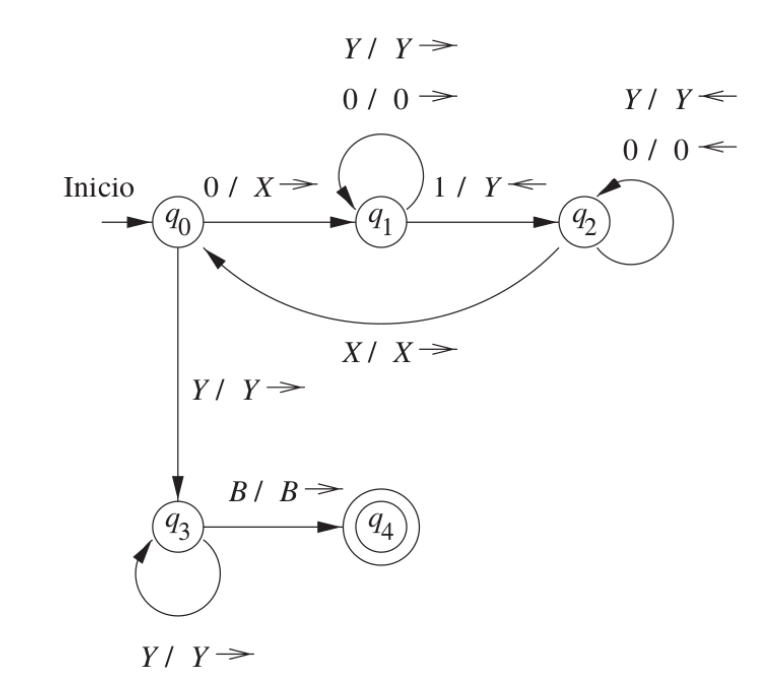

In [ ]:
from IPython.display import Image
Image(filename='files/TM_1.png',width=500)

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 1. Diagrama de estados de TM No.1</div>
</div>
<br>

In [ ]:
dtm = DTM(
    states={'q0', 'q1', 'q2', 'q3', 'q4'},
    input_symbols={'0', '1'},
    tape_symbols={'0', '1', 'x', 'y', '.'}, #El punto se usa para limpiar el símbolo de la cinta
    transitions={
        'q0': {
            '0': ('q1', 'x', 'R'),
            'y': ('q3', 'y', 'R')
        },
        'q1': {
            '0': ('q1', '0', 'R'),
            '1': ('q2', 'y', 'L'),
            'y': ('q1', 'y', 'R')
        },
        'q2': {
            '0': ('q2', '0', 'L'),
            'x': ('q0', 'x', 'R'),
            'y': ('q2', 'y', 'L')
        },
        'q3': {
            'y': ('q3', 'y', 'R'),
            '.': ('q4', '.', 'R')
        }
    },
    initial_state='q0',
    blank_symbol='.',
    final_states={'q4'}
)

El método **validate_input** sirve para validar las cadenas 

Si la cadena es aceptada devuelve una tupla que contiene el estado donde se detuvo la máquina

In [ ]:
dtm.validate_input('01')


('q4', TMTape('xy.'))

Si la cadena no es aceptada el método lanza un error

In [ ]:
dtm.validate_input('001')

#### **Ejemplo 3**

Construye una máquina de turing que acepta el lenguaje $L=\{a^i b^i c^i :i\geq0 \} $ y que se detiene al procesar todas las entradas. Por consiguiente, $L$ es un lenguaje recursivo pero no $LIC$, es decir $L$ no puede ser aceptado por ningún autómata con pila 

In [ ]:
dtm3 = DTM(
)

In [ ]:
dtm3.validate_input('aabbcc')

In [ ]:
dtm3.validate_input('aaaaaabbbbbbcccccc')

### Ejercicio

Diseñe una máquina de Turing que reconozca el siguiente lenguaje $L= \{ uu^{R} | u \in \{a, b\}^{*} \}$

In [ ]:
from automatalib.tm.dtm import DTM
dtm4 = DTM(
)

In [ ]:
dtm4.validate_input('Baabbaa')

In [ ]:
[(state, tape.copy()) for state, tape in dtm4.validate_input('Baabbaa', step=True)]

[1] Implementación de una Máquina de Turing universal: https://rosettacode.org/wiki/Universal_Turing_machine

[2] Libreria en Python para máquinas de Turing: https://pypi.python.org/pypi/turing_machine